In [13]:
# Split the data into input and target variables
X = datac.drop("price", axis=1)
y = datac["price"]

In [14]:
scaler = MinMaxScaler()
scaler2= StandardScaler()
X_MM = scaler.fit_transform(X)
X_SS = scaler2.fit_transform(X)
X_MinMax = pd.DataFrame(X_MM, columns=X.columns)
X_StaSca = pd.DataFrame(X_SS, columns=X.columns)

In [15]:
X_MinMax.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_lifetime
0,0.06250,0.066667,0.061503,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.161934,0.005742,0.521739
1,0.06250,0.233333,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.222165,0.008027,0.208696
2,0.03125,0.066667,0.030372,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.399415,0.008513,0.713043
3,0.09375,0.333333,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.165376,0.004996,0.434783
4,0.06250,0.200000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.241094,0.007871,0.243478


In [16]:
X_StaSca.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_lifetime
0,-0.402903,-1.451073,-0.980652,-0.228182,-0.915552,-0.087205,-0.305715,-0.629986,-0.560800,-0.735251,-0.659031,-0.943676,-0.260627,0.638098
1,-0.402903,0.174486,0.533369,-0.189739,0.937431,-0.087205,-0.305715,-0.629986,-0.560800,0.460776,0.244602,-0.432887,-0.187700,-0.611555
2,-1.482493,-1.451073,-1.427234,-0.123139,-0.915552,-0.087205,-0.305715,-0.629986,-1.413190,-1.230575,-0.659031,1.070292,-0.172190,1.401775
3,0.676687,1.149821,-0.131057,-0.243878,-0.915552,-0.087205,-0.305715,2.444427,-0.560800,-0.892305,1.396734,-0.914488,-0.284459,0.290972
4,-0.402903,-0.150626,-0.436040,-0.169503,-0.915552,-0.087205,-0.305715,-0.629986,0.291589,-0.131197,-0.659031,-0.272353,-0.192686,-0.472705


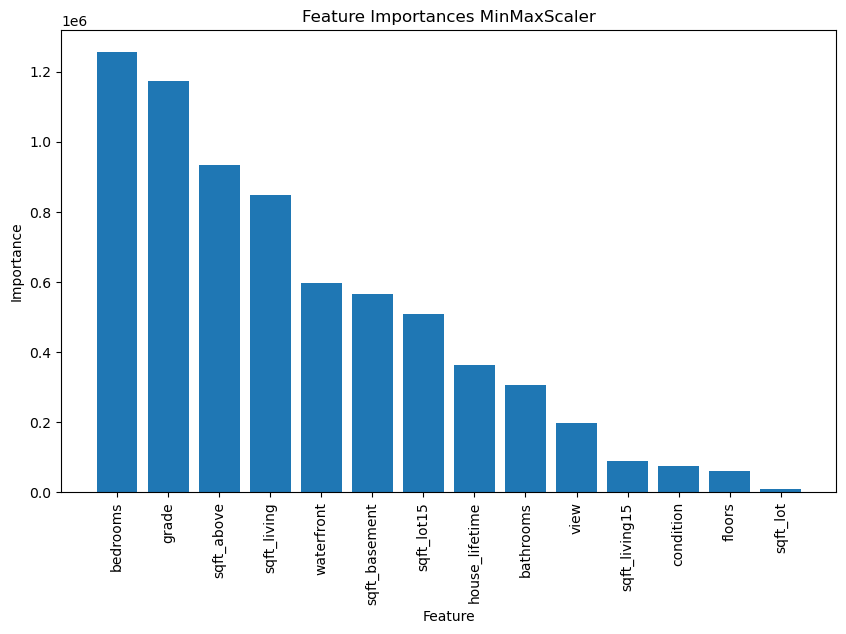

In [17]:
# Fit a linear regression model to the data
modelMM = LinearRegression()
modelSS = LinearRegression()
modelMM.fit(X_MinMax, y)
modelSS.fit(X_StaSca, y)

# Calculate the feature importances
importancesMM = np.abs(modelMM.coef_)
importancesSS = np.abs(modelSS.coef_)
feature_names = X.columns

# Sort the features by importance
indicesMM = np.argsort(importancesMM)[::-1]
indicesSS = np.argsort(importancesSS)[::-1]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_MinMax.shape[1]), importancesMM[indicesMM])
plt.xticks(range(X_MinMax.shape[1]), feature_names[indicesMM], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances MinMaxScaler")
plt.show()

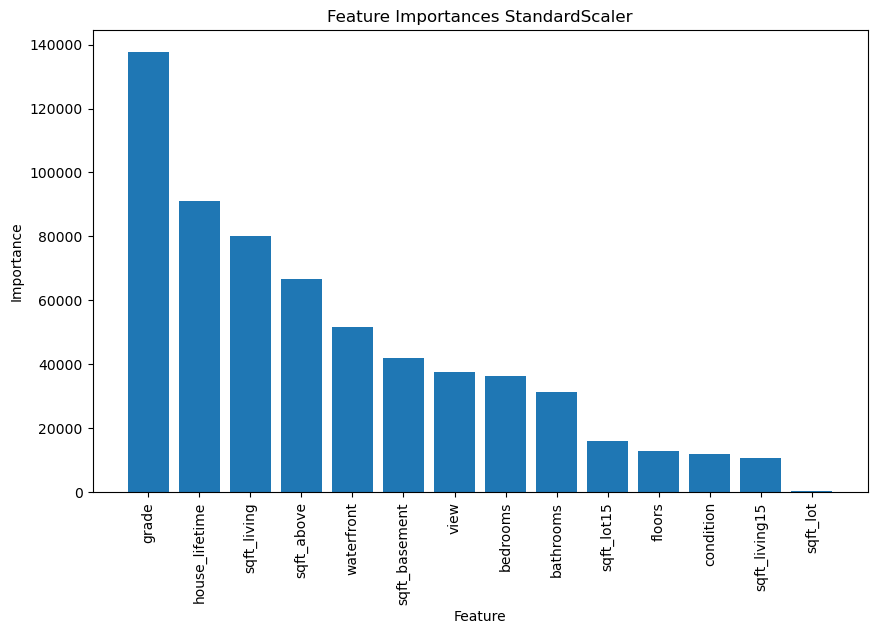

In [18]:
# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_StaSca.shape[1]), importancesSS[indicesSS])
plt.xticks(range(X_StaSca.shape[1]), feature_names[indicesSS], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances StandardScaler")
plt.show()

<h1 style="color: #00BFFF;">03 | EDA</h1>

<h2 style="color: #008080;">Dealing with Duplicates</h2>

## MinMax Result

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_MinMax, y, test_size=0.3, random_state=42) 

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# make predictions using your model
y_pred = modelMM.predict(X_test)

# calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Absolute Error: 143031.37765623006
Mean Squared Error: 50644318709.0747
R^2 Score: 0.6180625593476153


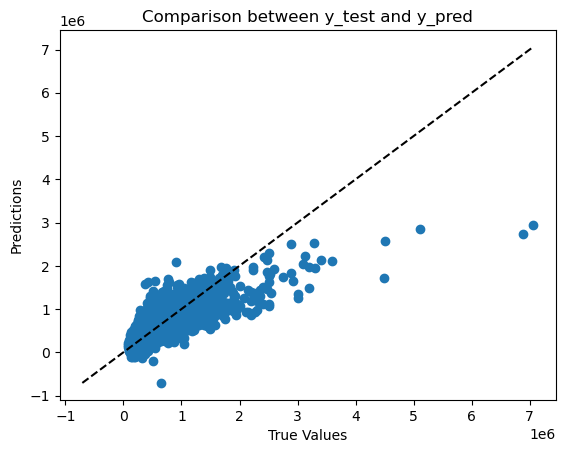

In [21]:
# plot the data
plt.scatter(y_test, y_pred)

# add labels and title
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Comparison between y_test and y_pred')

# add a line representing perfect prediction
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'k--')

# show the plot
plt.show()

## Standard Scaler Results

In [22]:
# Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_StaSca, y, test_size=0.3, random_state=42) 

In [23]:

# make predictions using your model
y_pred2 = modelSS.predict(X_test2)

# calculate mean absolute error
mae2 = mean_absolute_error(y_test2, y_pred2)
print("Mean Absolute Error:", mae2)

# calculate mean squared error
mse2 = mean_squared_error(y_test2, y_pred2)
print("Mean Squared Error:", mse2)

# calculate R^2 score
r22 = r2_score(y_test2, y_pred2)
print("R^2 Score:", r22)

Mean Absolute Error: 143031.37765623006
Mean Squared Error: 50644318709.0747
R^2 Score: 0.6180625593476153


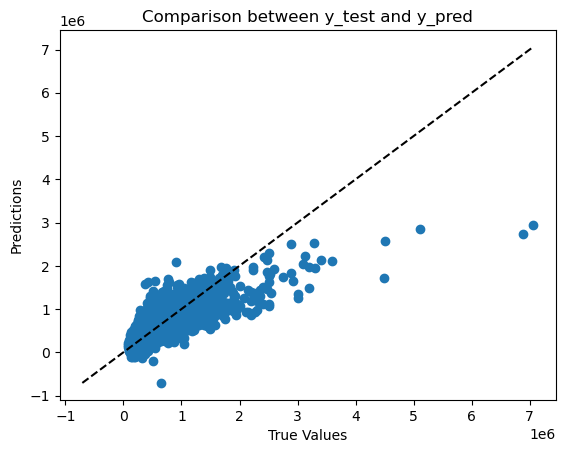

In [24]:
# plot the data
plt.scatter(y_test2, y_pred2)

# add labels and title
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Comparison between y_test and y_pred')

# add a line representing perfect prediction
min_val = min(np.min(y_test2), np.min(y_pred2))
max_val = max(np.max(y_test2), np.max(y_pred2))
plt.plot([min_val, max_val], [min_val, max_val], 'k--')

# show the plot
plt.show()

In [50]:
import folium
import pandas as pd

# Define the coordinates of Seattle
seattle_coords = [47.606, -122.2]

# Create a map centered on Seattle
seattle_map = folium.Map(location=seattle_coords, zoom_start=9)

# Add a marker for each set of coordinates
for index, row in Seattle.iterrows():
    lat = row['lat']
    lon = row['long']
    marker = folium.Marker([lat, lon])
    marker.add_to(seattle_map)

# Save the map as an HTML file
seattle_map

